In [1]:
%matplotlib inline
# globals
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

In [2]:
# matplotlib default customizations
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color = ['blue','green','red',
                                           'cyan','magenta','orange','olive',
                                          'yellow', 'palegreen','black',])
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.titlesize'] = 8
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.subplot.hspace'] = 0.5
mpl.rcParams['figure.subplot.wspace'] = 0.5
mpl.rcParams['font.size'] = 8
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

In [3]:
data = pd.read_csv('../processeddata/20160405_hek293t_puroincorporation_3reps_richleuargtorin1.csv')
print data

     samplelabel  mean_relativepuroincorporation     stdev     sterr
0           Rich                        1.000000       NaN       NaN
1           -Leu                        0.635484  0.022979  0.013267
2           -Arg                        0.520678  0.058752  0.033920
3  Rich + Torin1                        0.402324  0.020116  0.011614


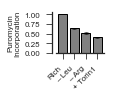

In [7]:
# ignore torin data for this plot
# data = data[data['samplelabel'] != 'Rich + Torin1']

fig = plt.figure()
ax = fig.add_subplot(111)

sampleOrder = np.array(range(len(data)))
xlocations = np.array(range(len(data)))
ax.bar(xlocations, data['mean_relativepuroincorporation'][sampleOrder], align='center', facecolor = 'grey',edgecolor='black',linewidth=1 )
ax.errorbar(xlocations, data['mean_relativepuroincorporation'][sampleOrder], 
            data['sterr'][sampleOrder], linestyle='None', color = 'black', elinewidth=0.5, capsize=2, capthick=0.5 )

spineOffset = {'left': 4, 'bottom': 0}   
[ spine.set_position(('outward',spineOffset[loc])) 
     if loc in ['left','bottom'] else spine.set_color('none') 
     for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

#ax.set_xlabel('Samples')
ax.set_xticks(xlocations)
xticklabels= data['samplelabel'][sampleOrder].apply(lambda x: x.replace('-',u'– ')).apply(lambda x: x.replace('Rich ',''))
ax.set_xticklabels(xticklabels, rotation=45, ha='right')

ax.set_ylabel( 'Puromycin\nIncorporation')

fig.set_size_inches([0.86,.75])
fig.savefig('../figures/20160410_hek293t_3repspuromycinincorporation_3hours_richleuargtorin1_forpaper.svg')